In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: In below, I plotted the distribution of Pokémon heights (given in meters).

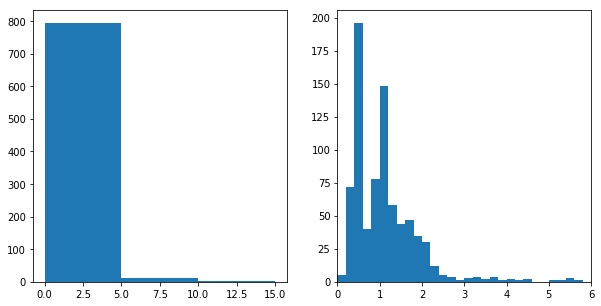

In [4]:
plt.figure(figsize = [10,5])

# left histogram: dta plotted in natural units
plt.subplot(1,2,1)
bin_edges = np.arange(0, pokemon.height.max()+5, 5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)


# right histogram: data plotted after direct log transformation
plt.subplot(1,2,2)
bin_edges = np.arange(0, 6+1, 0.2) 
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.xlim(0,6);

**Task 2**: In this task,I plotted the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, I had to perform an _axis transformation_ as part of visualization workflow.

In [5]:
log_data = np.log10(pokemon.weight)

In [6]:
log_data.describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

Text(0.5,0,'Weight (kg)')

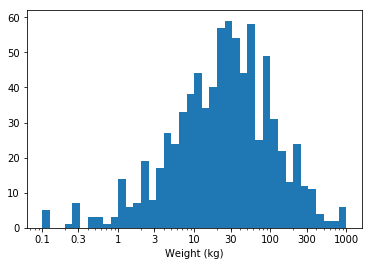

In [7]:
#Due to heavily skewed data, use a log transformation on the x-axis
# bin edges are increments of 0.1 power of ten, with custom tick marks to demonstrate the log calling
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')